# PyCaret Stock Prediction Part 2

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# yahoo finance used to fetch data 
import yfinance as yf
yf.pdr_override()

In [3]:
df= yf.download("AMD", start="2020-01-01", end="2022-01-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-27,147.509995,154.889999,147.250000,154.360001,154.360001,53296400
2021-12-28,155.880005,156.729996,151.380005,153.149994,153.149994,58699100
2021-12-29,152.820007,154.339996,147.289993,148.259995,148.259995,51300200
2021-12-30,147.440002,148.850006,144.850006,145.149994,145.149994,44358000
2021-12-31,146.160004,148.610001,143.550003,143.899994,143.899994,49448100


In [6]:
df = df.reset_index()

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100
1,2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400
2,2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900
3,2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400
4,2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000


In [8]:
df = df.drop('Date', axis=1)

In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
0,46.860001,49.250000,46.630001,49.099998,49.099998,80331100
1,48.029999,49.389999,47.540001,48.599998,48.599998,73127400
2,48.020000,48.860001,47.860001,48.389999,48.389999,47934900
3,49.349998,49.389999,48.040001,48.250000,48.250000,58061400
4,47.849998,48.299999,47.139999,47.830002,47.830002,53767000


In [10]:
df.shape

(505, 6)

In [11]:
data = df.sample(frac=0.9)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (454, 6)
Unseen Data For Predictions: (51, 6)


In [12]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Adj Close', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Adj Close
2,Original Data,"(454, 6)"
3,Missing Values,False
4,Numeric Features,5
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(317, 1)"


In [13]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,19.6135,693.0791,26.2305,-0.0099,0.3160,0.2660,0.3610
lasso,Lasso Regression,19.6135,693.0791,26.2305,-0.0099,0.3160,0.2660,0.2250
ridge,Ridge Regression,19.6135,693.0791,26.2305,-0.0099,0.3160,0.2660,0.0030
en,Elastic Net,19.6135,693.0791,26.2305,-0.0099,0.3160,0.2660,0.0030
lar,Least Angle Regression,19.6135,693.0791,26.2305,-0.0099,0.3160,0.2660,0.0030
omp,Orthogonal Matching Pursuit,19.6135,693.0791,26.2305,-0.0099,0.3160,0.2660,0.0030
br,Bayesian Ridge,19.6135,693.0791,26.2305,-0.0099,0.3160,0.2660,0.0030
dummy,Dummy Regressor,19.7496,700.0540,26.3491,-0.0176,0.3195,0.2718,0.0030
llar,Lasso Least Angle Regression,19.7496,700.0540,26.3491,-0.0176,0.3195,0.2718,0.0030
lightgbm,Light Gradient Boosting Machine,19.7141,698.4762,26.3549,-0.0257,0.3132,0.2615,0.0100


In [14]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [15]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,21.0670,645.8984,25.4145,-0.3381,0.3508,0.3426
1,23.2940,932.4831,30.5366,-0.0696,0.3535,0.3017
2,19.9890,850.0099,29.1549,-0.3965,0.3403,0.2764
3,19.2631,668.3249,25.8520,-0.0330,0.3148,0.2616
4,19.7073,596.7732,24.4289,-0.0058,0.3125,0.2817
5,20.7378,711.2382,26.6690,0.0636,0.3182,0.2849
6,23.1140,1008.3545,31.7546,-0.1908,0.3564,0.2798
7,20.1686,652.7523,25.5490,0.0264,0.3103,0.2766
8,18.0296,607.8691,24.6550,-0.0857,0.3088,0.2510


In [16]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


In [17]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18.3653,513.8202,22.6676,-0.0645,0.3092,0.2839
1,21.6836,824.5789,28.7155,0.0542,0.3277,0.2716
2,18.1980,762.2940,27.6097,-0.2524,0.3169,0.2380
3,19.2097,645.6572,25.4098,0.0021,0.2993,0.2480
4,19.2336,585.6626,24.2005,0.0129,0.3078,0.2663
5,20.1925,711.6102,26.6760,0.0631,0.3166,0.2749
6,22.2780,882.1756,29.7014,-0.0417,0.3221,0.2545
7,20.2564,677.7166,26.0330,-0.0108,0.3039,0.2568
8,18.6360,648.8172,25.4719,-0.1589,0.3158,0.2613


In [18]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,26.3884,1069.4160,32.7019,-1.2155,0.4023,0.3653
1,28.6534,1493.3905,38.6444,-0.7130,0.4557,0.3560
2,22.4700,1017.7743,31.9026,-0.6721,0.3847,0.2893
3,24.0712,1048.9341,32.3873,-0.6213,0.4008,0.3488
4,20.8759,763.0484,27.6233,-0.2861,0.3530,0.2661
5,28.6697,1667.4912,40.8349,-1.1953,0.4598,0.3965
6,24.8731,1214.4265,34.8486,-0.4341,0.4140,0.2778
7,22.5771,950.7402,30.8341,-0.4180,0.3722,0.2662
8,24.7742,1335.2899,36.5416,-1.3850,0.4118,0.3277


In [19]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18.1057,539.9845,23.2376,-0.1187,0.3145,0.2823
1,21.1889,848.1671,29.1233,0.0271,0.3301,0.2621
2,18.2319,808.6902,28.4375,-0.3286,0.3238,0.2416
3,17.7039,620.6418,24.9127,0.0407,0.2967,0.2274
4,17.9493,545.2929,23.3515,0.0810,0.2963,0.2451
5,19.2344,691.5446,26.2972,0.0896,0.3022,0.2500
6,21.8654,912.5246,30.2080,-0.0776,0.3289,0.2562
7,18.4540,589.7403,24.2846,0.1204,0.2847,0.2390
8,17.7604,578.8810,24.0599,-0.0339,0.2986,0.2372


In [20]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1e-06, loss='linear',
                  n_estimators=240, random_state=123)


In [21]:
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [22]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18.3653,513.8202,22.6676,-0.0645,0.3092,0.2839
1,21.6836,824.5789,28.7155,0.0542,0.3277,0.2716
2,18.1980,762.2940,27.6097,-0.2524,0.3169,0.2380
3,19.2097,645.6572,25.4098,0.0021,0.2993,0.2480
4,19.2336,585.6626,24.2005,0.0129,0.3078,0.2663
5,20.1925,711.6102,26.6760,0.0631,0.3166,0.2749
6,22.2780,882.1756,29.7014,-0.0417,0.3221,0.2545
7,20.2564,677.7166,26.0330,-0.0108,0.3039,0.2568
8,18.6360,648.8172,25.4719,-0.1589,0.3158,0.2613


In [23]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [24]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17.7621,520.0576,22.8048,-0.0774,0.3122,0.2778
1,22.9240,913.3768,30.2221,-0.0477,0.3480,0.2931
2,17.4990,742.7014,27.2525,-0.2202,0.3125,0.2330
3,17.7271,613.7878,24.7747,0.0513,0.2884,0.2263
4,18.8709,562.1019,23.7087,0.0526,0.3040,0.2644
5,20.5328,753.5487,27.4508,0.0079,0.3242,0.2755
6,21.8386,895.7459,29.9290,-0.0578,0.3264,0.2595
7,19.1256,630.7175,25.1141,0.0593,0.2964,0.2487
8,18.1000,551.7574,23.4895,0.0145,0.2937,0.2489


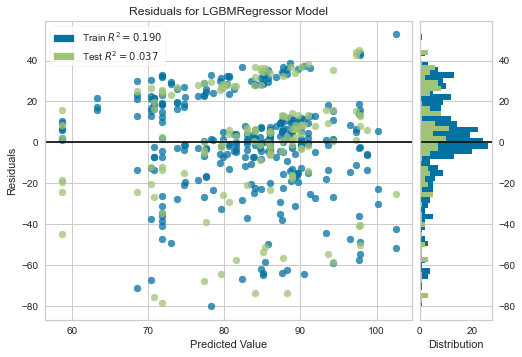

In [25]:
plot_model(tuned_lightgbm)

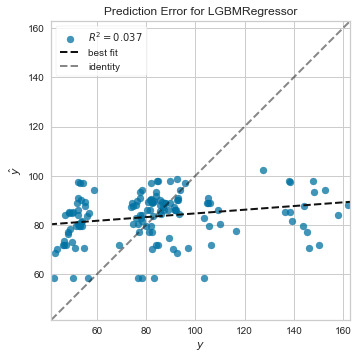

In [26]:
plot_model(tuned_lightgbm, plot = 'error')

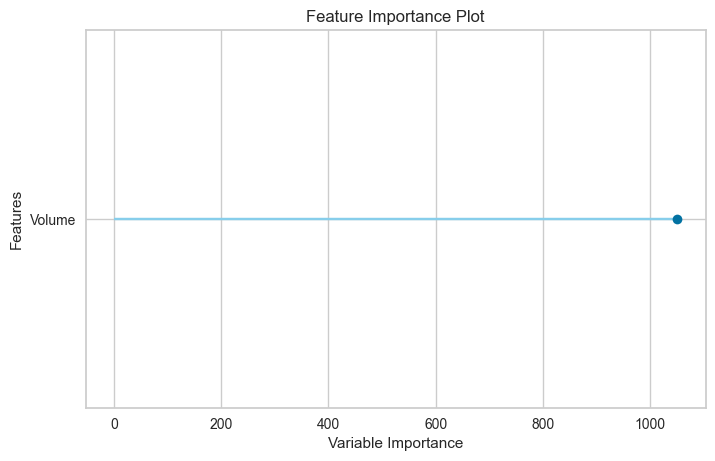

In [27]:
plot_model(tuned_lightgbm, plot='feature')

In [28]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [29]:
predict_model(tuned_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,21.2796,790.2075,28.1106,0.0367,0.3269,0.2800


,Volume,Adj Close,Label
0,46923700.0,143.880005,79.632868
1,108920304.0,84.019997,71.757251
2,80004896.0,50.349998,58.663156
3,87462704.0,82.540001,70.329650
4,141493792.0,150.160004,71.757251
...,...,...,...
132,141972304.0,46.750000,71.757251
133,42737100.0,49.840000,84.844685
134,74599200.0,46.580002,73.723483
135,48600200.0,97.250000,70.788347


In [30]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [31]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [32]:
predict_model(final_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,19.4685,650.7572,25.5099,0.2067,0.2954,0.2547


,Volume,Adj Close,Label
0,46923700.0,143.880005,91.291511
1,108920304.0,84.019997,82.826447
2,80004896.0,50.349998,63.884636
3,87462704.0,82.540001,69.185671
4,141493792.0,150.160004,82.826447
...,...,...,...
132,141972304.0,46.750000,82.826447
133,42737100.0,49.840000,81.269784
134,74599200.0,46.580002,74.989748
135,48600200.0,97.250000,72.707214


In [33]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,20.6450,731.6685,27.0494,-0.0073,0.3186,0.2710


,Open,High,Low,Close,Adj Close,Volume,Label
0,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,97.454231
1,48.660000,48.860001,48.240002,48.750000,48.750000,34266800,87.146169
2,47.700001,49.290001,47.070000,47.490002,47.490002,86378400,72.368946
3,45.380001,46.240002,42.209999,44.009998,44.009998,106416200,56.304898
4,48.680000,49.720001,47.509998,48.110001,48.110001,98302700,84.616896


In [34]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Adj Close'], unseen_predictions.Label, 'R2')

-0.0073

In [35]:
new_prediction = predict_model(final_lightgbm, data=data_unseen)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,20.6450,731.6685,27.0494,-0.0073,0.3186,0.2710


In [36]:
new_prediction.head()

,Open,High,Low,Close,Adj Close,Volume,Label
0,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,97.454231
1,48.660000,48.860001,48.240002,48.750000,48.750000,34266800,87.146169
2,47.700001,49.290001,47.070000,47.490002,47.490002,86378400,72.368946
3,45.380001,46.240002,42.209999,44.009998,44.009998,106416200,56.304898
4,48.680000,49.720001,47.509998,48.110001,48.110001,98302700,84.616896


In [37]:
from pycaret.utils import check_metric
check_metric(new_prediction['Adj Close'], new_prediction.Label, 'R2')

-0.0073